# Weekly project part 1
    Using the image "appletree.jpg"
    A) Can you segment the apples from the tree?
    B) Can you get the computer to count how many there are? 
        How close can you get there are 26.
    C) Can you change color of one of them?
    D) Can you segment the leaves?
    
    
# Weekly project part 2
    A) Remove the greenscreen and replace the background in "itssp.png"?
    B) Can improve the edge with erroding/dialating?


In [37]:
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt

In [38]:
path = "appletree.jpg"

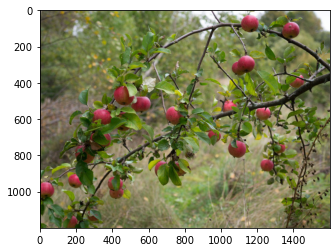

In [76]:
bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
plt.imshow(image)

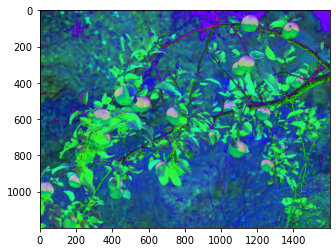

In [77]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
plt.imshow(hsv)

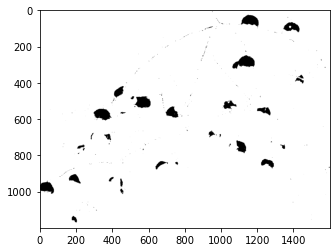

In [78]:
lower1 = np.array([160,40,40])
upper1 = np.array([180,255,255])

double_thresh1 = cv2.inRange(hsv, lower1, upper1)
no_red1 = cv2.bitwise_not(double_thresh1)

#thresh = cv2.threshold(gray, threshold, threshold_value, cv2.THRESH_BINARY_INV)[1]
plt.imshow(no_red1, cmap='gray')

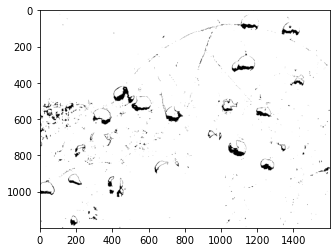

In [79]:
lower2 = np.array([0,40,40])
upper2 = np.array([10,255,255])

double_thresh2 = cv2.inRange(hsv, lower2, upper2)
no_red2 = cv2.bitwise_not(double_thresh2)

#thresh = cv2.threshold(gray, threshold, threshold_value, cv2.THRESH_BINARY_INV)[1]
plt.imshow(no_red2, cmap='gray')

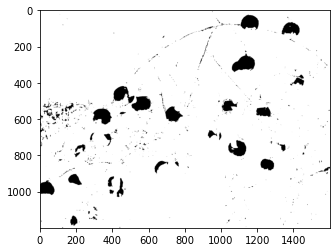

In [80]:
output = cv2.bitwise_and(no_red1, no_red2)
plt.imshow(output, cmap='gray')

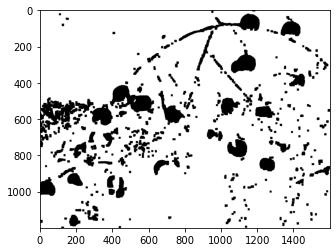

In [81]:
mask1 = output.copy()
mask1 = cv2.erode(mask1, None, iterations = 5)
plt.imshow(mask1, cmap = 'gray')

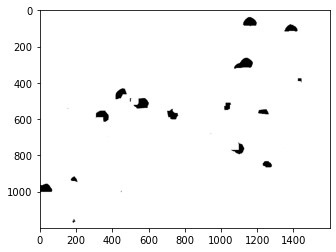

In [82]:
mask2 = mask1.copy()
mask2 = cv2.dilate(mask2, None, iterations = 15)
plt.imshow(mask2, cmap = 'gray')

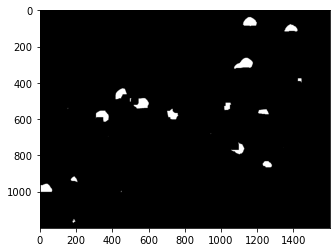

In [83]:
yes_apple = cv2.bitwise_not(mask2)
plt.imshow(yes_apple, cmap = 'gray')

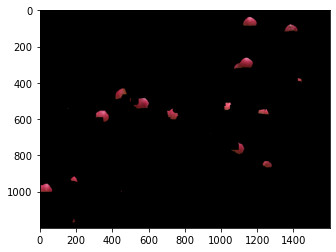

In [84]:
segment_apple = cv2.bitwise_and(image, image, mask=yes_apple)
plt.imshow(segment_apple)

In [85]:
#thresh_image = segment_apple.astype(np.uint8)

cnts = cv2.findContours(yes_apple, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

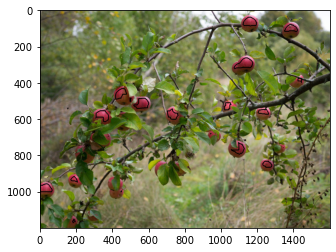

In [86]:
for c in cnts:
    # draw each contour on the output image with a 3px thick black outline
    cv2.drawContours(output, [c], -1, (0, 0, 0), 3)
    
plt.imshow(output)

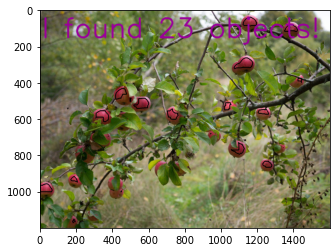

In [87]:
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 150),  cv2.FONT_HERSHEY_SIMPLEX, 5, (155, 0, 155), 10)
plt.imshow(output)

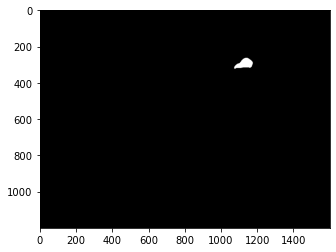

In [88]:
blue_apple = cnts[20]
zeros = np.zeros_like(yes_apple)
cv2.drawContours(zeros, [blue_apple], -1, (255, 255, 255), -1)

plt.imshow(zeros, cmap = 'gray')

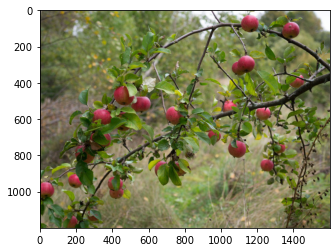

In [89]:
image[(zeros==255).all(-1)] = [0,0,255]
plt.imshow(image)